In [63]:
from time import time
import numpy as np
import numpy.linalg as alg
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.ticker as mtick
from matplotlib import offsetbox
from sklearn.manifold import MDS, Isomap, LocallyLinearEmbedding

In [44]:
# Load Data
X = np.loadtxt('face.csv', delimiter=',')
X = X.T

# Identify the shape
(N, P)= X.shape
print('The shape of face matrix now is {}'.format(X.shape))

# Normalization
one = np.ones((N,1))
X = X-one.dot(one.T).dot(X)

(10304, 33)
The shape of face matrix now is (33, 10304)


In [45]:
# SVD by nimpy 
# u @ np.diag(s) @ vh = (u * s) @ vh
u, s, vh = alg.svd(X)

print('The shape of u is', u.shape)
print('The shape of s is', s.shape)
print('The shape of v is', vh.shape)

M = u[:,:2]
p1 = M[:, 0]
p2 = M[:, 1]

pairs = [(p1[i], i) for i in range(N)]
pairs.sort(key = lambda pairs: pairs[0])

order = [j for (i, j) in pairs]

The shape of u is (33, 33)
The shape of s is (33,)
The shape of v is (10303, 10303)


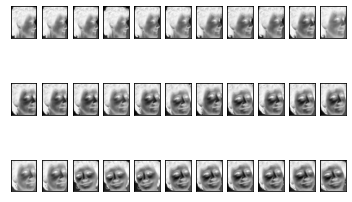

In [71]:
plt.figure()
cmap = cm.gray_r
# Attention! Load X again for the natural arangement of the photo matrix is broken
# when the tensor is reduced from 3 dimension to 2 dimension.
X = np.loadtxt('face.csv', delimiter=',')

for i in range(N):
    idx = order[i]
    pic = X[:, idx]
    pic_matrix = np.reshape(pic, (92, 112))
    
    plt.subplot(3, 11, i+1)
    plt.imshow(pic_matrix.T, cmap=cmap)
    plt.xticks([])
    plt.yticks([])

plt.show()
    

In [72]:
Original_X = X
X = X.T
print(X.shape)

(33, 10304)


In [77]:
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)
    
    plt.figure()
    ax = plt.subplot(111)
    plt.scatter(X[:, 0], X[:, 1])
    
    if hasattr(offsetbox, 'AnnotationBbox'):
        for i in range(X.shape[0]):
            pic = Original_X[:, i]
            pic_matrix = np.reshape(pic, (92, 112))
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(pic_matrix.T, cmap = cmap, zoom=.2),
                X[i])
            ax.add_artist(imagebox)
    plt.xticks([])
    plt.yticks([])
    if title is not None:
        plt.title(title)
    pic_matrix = np.reshape(pic, (92, 112))
    plt.show()

MDS Projection of 33 faces


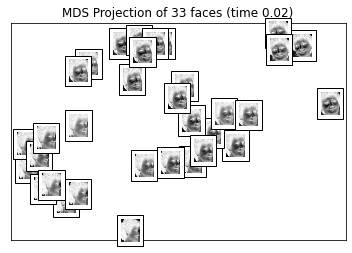

In [78]:
print('MDS Projection of 33 faces')
t0 = time()
mds = MDS(n_components=2, n_init=1, max_iter=100)
X_mds = mds.fit_transform(X)
plot_embedding(X_mds, 'MDS Projection of 33 faces (time %.2f)'%(time()-t0))

Computing Isomap Projection of 33 faces


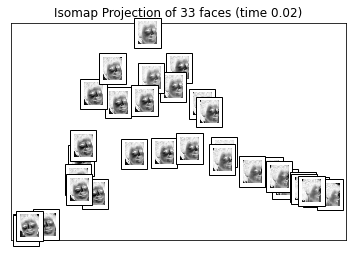

In [79]:
print("Computing Isomap Projection of 33 faces")
t0 = time()
iso = Isomap(n_neighbors=5, n_components=2)
X_iso = iso.fit_transform(X)
plot_embedding(X_iso, 'Isomap Projection of 33 faces (time %.2f)'%(time()-t0))

Computing LLE of 33 faces


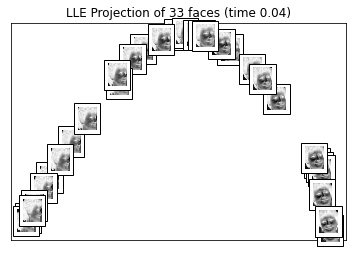

In [80]:
print('Computing LLE of 33 faces')
t0 = time()
lle = LocallyLinearEmbedding(n_neighbors=5, n_components=2)
X_lle = lle.fit_transform(X)
plot_embedding(X_lle, 'LLE Projection of 33 faces (time %.2f)'%(time()-t0))